# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

In [1]:
#k0 and k1 randomly generated integers between the value 1 and 100
#they are the inputs to the function
#Randomly generate the coeficent of the lines a,b,c and x. and then calculate y
# randomly generate k0 points belowthe line for this -(ax+c)/b<0
# randomly generate k1 points belowthe line for this -(ax+c)/b>0
#Then plot the lines

import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(k0, k1):
    """
    Your code for generating the dataset goes here! The output should X and y.
    You should call the visualization function from this function. Every time we 
    run this cell, it should plot a new dataset along with the line which was used
    to generate that dataset. We will test this by changing the values of k and
    running the cell multiple times
    """
    a = np.random.uniform(-100,100)
    b = np.random.uniform(-100,100)
    c = np.random.uniform(-100,100)  
    x = np.random.uniform(-100,100,k0+k1)
    x0=[]
    x1=[]
    y= []
    y0=[]
    y1=[]
    Y=[]
    
    for i in range (len(x)):
            
            y.append(-(a*x[i]+c)/b)
            
    for i in range (k0):
            n0 = np.random.uniform(-100,-10)
            x0.append(x[i])
            y0.append(n0-((a*x[i]+c)/b))
            Y.append(1)
           
    for i in range (k0,k0+k1):
            n1 = np.random.uniform(10,100)    
            x1.append(x[i])
            y1.append(n1-((a*x[i]+c)/b))
            Y.append(-1)
            
    l0= np.array((x0,y0)).T
    l1= np.array((x1,y1)).T
   # print(l0)
    #print(l1)
    X= np.concatenate((l0,l1))
    plotLineAndPoints(l0,l1,(a,b,c))
   # print(X)
    return (X,Y)

def plotLineAndPoints(l1,l2,*l3):
  # Your code goes here
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    x = np.random.uniform(-100,100,100)
    y=[]
    for i in range(len(l1)):
        x1.append(l1[i][0])
        y1.append(l1[i][1])

    plt.plot(x1,y1,'r+',label="class0")

    for j in range(len(l2)):
        x2.append(l2[j][0])
        y2.append(l2[j][1])

    plt.plot(x2,y2,'bo',label="class1")
    if(len(l3)!=0):
        a=l3[0][0]
        b=l3[0][1]
        c=l3[0][2]
        for i in range (len(x)):
            y.append(-(a*x[i]+c)/b)

    plt.plot(x,y,'g',label="line")
    plt.ylabel('Y axis')
    plt.xlabel('X axis')
    plt.title('X Vs Y')
    plt.legend()
   


    # 3 points below line 
    # 2 points above line
k0 = np.random.randint(1,100)
k1 = np.random.randint(1,100)
(X,Y) =generate_dataset(k0,k1)


### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





array([  74.28743509, -161.31947315, -254.71164451])

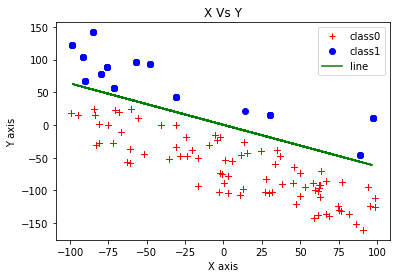

In [7]:
#The function fit takes input X and Y
# where X is an array of points and Y specifies the class(0 or 1)
# for each point i'm summing the coef*point(w0*x0+w1*x1+w2*x2)
# if the class is 1 then the summation should be greater > if not changing the value of w's
#for class 0 doing the opposite
def fit(X, y):
    """
    Your code for Task 2 goes here. Apart from writing the fit function,
    you should also write code to not plot the points in the dataset,
    but also plot the learned line represented by w. We will test this, by running 
    the cell for task 1 (thus generating a new dataset) and then running this cell.
    Even though the visualization of done for d=3 and 2-D points, your code should be
    generic and be able to handle any d. This will also be tested.
    """
    d=X.shape[1]
    w = np.random.uniform(0,100,d+1)
   # x = np.random.uniform(0,100,d)
    X1 = np.zeros(shape=(len(X),d+1))
    x0=[]
    x1=[]
    y0=[]
    y1=[]
    for i in range(0,len(X)):
        for j in range (0,d+1):
            if (j==0):
                X1[i][j] = 1
            else :    
                X1[i][j]=X[i][j-1]
    recheck = True
    while recheck:
        recheck = False   
        for i in range(0,len(X1)):
            sum=0
            for j in range (0,d+1):
                sum+=w[j]*X1[i][j]
    
            if(Y[i]==-1):
                x1.append(X1[i][1])
                y1.append(X1[i][2])
                if sum>0 :
                    temp = w +X1[i]*y[i]
                    w= temp
                    recheck = True
                    break

            if(Y[i]==1):
                x0.append(X1[i][1])
                y0.append(X1[i][2])
                if sum<0 :
                    temp =w+ X1[i]*y[i]
               #     print("looo:",w)
                    w= temp
                #    print("new w:",w) 
                    recheck = True
                    break

       # print(sum)
     
    l0= np.array((x0,y0)).T
    l1= np.array((x1,y1)).T
#    print(l0)
 #   print(l1)
  #  print(w[0],w[1],w[2])
    plotLineAndPoints(l0,l1,(w[1],w[2],w[0]))
    #pass
    return(w)

#(X,Y)= generate_dataset(80, 100)
fit(X,Y)   

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

 ### ANSWER:
 Predict "y=1" if aX1+bX2+c >=0 
 we know that y = 1 is more likely when g(z)>0.5 and dot(theta.T,X)>0

for every point in X, i am checking if the sum of aX1+bX2+c is >0,
if it is now then i am updating the value of w = w+x.y
then again recheking the sum
here the points w(a b and c) are being updated so as to satisfy the condition
we are moving the line up

for "y=1" aX1+bX2+c <0
for every point in X, i am checking if the sum of aX1+bX2+c is <0,
if not udpdate the points same as above
weare moving the line down

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

### ANSWER:
If the data is not linearly seperable, we can add extra higher order polynomial
example:
if h(x)=g(w0 + w1X1 + w2X2 + w3X1^2 + w4X2^2)
now if by  regression we get w0=-1 w1=0 w2=0 w3=1 w4=1
This means that hypthesis will predict 1 if
predict y="1" if -1 +X1^2 +X2^2>=0  (X1^2 +X2^2>=1)
This is a circle with radius 1 and all points outside the circle will be y="1"
and all points inside the circle will be y="0"


## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

### REFERENCE : https://www.coursera.org/learn/machine-learning/home/welcome
                     ANDEW NG


### ANSWER:
3. For the particular problem OLS is faster than gradient descent. This is beacues the size of Boston Housing dataset is only 506

if the dataset had size greater than 10000 then gradient descent would have been faster than OLS
Reason : The calculation of inv((X.T,X)) is very slow if n>10000


In [8]:
def feature_normalize(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    mean = np.mean(X, axis=0)
    mu = np.subtract(X,mean)
    SD= np.std(X, axis=0)
    sigma = X/SD
    X_norm=(mu/SD)
    print("Xnorm:",X_norm)
   
    return X_norm, mu, sigma



In [9]:
#This is the cost function
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    m = y.size
    cost = 0
    h0=np.dot(X,theta.T)
    t = ((h0-y)**2)/(2*m)
    for i in range(0, len(t)):
        cost= cost+ t[i]
    return cost

#cost_function([3,1, y, theta)



In [10]:
#This function calculates the gradient descent -->the differnet theta values

def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    temp =np.zeros(len(theta))
    for i in range(0, num_iters):
        '''
        Implement gradient descent for a single gradient step on the parameter 
        vector theta. Save the result of each iteration on J_history.
        '''
        J_history[i] = cost_function(X, y, theta)
        h0=np.dot(theta,X.T)
        t=(y-h0)
        temp =np.dot(t,X)
        theta +=  learning_rate*temp/m
        
    return theta ,J_history


In [11]:
from numpy.linalg import inv
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.zeros((X.shape[1], 1))
    temp0 = np.dot(X.T,X)
    inverse = inv(temp0)
    temp1 = np.dot(inverse,X.T)
    theta =np.dot(temp1,y)
    return theta

In [12]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [13]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalize(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...
Xnorm: [[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Running gradient descent ...
Theta computed from gradient descent : 
[22.53269111 -0.80153942  0.86697613 -0.23056994  0.73597162 -1.70194762
  2.83315488 -0.08096679 -2.85876596  1.61270393 -1.01025156 -1.97669241
  0.8702363  -3.67513307]


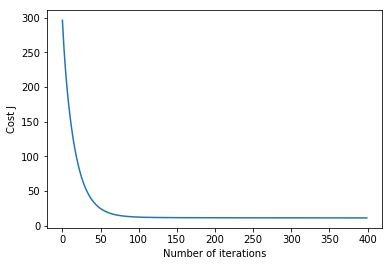

In [14]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400
# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
#cost_function(X, y, theta)
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [15]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target

X = np.c_[np.ones(m), X] # Add intercept term to X

theta = linearRegression_ols(X, y)

# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [16]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    
    mean = np.mean(X, axis=0)
    mu = np.subtract(X,mean)
    SD= np.std(X, axis=0)
    sigma = X/SD
    X_norm=(mu/SD)
    print("Xnorm:",X_norm)
   
   # X_norm = X
   # mu = np.zeros(n)
   # sigma = np.zeros(n)

    return X_norm, mu, sigma

In [17]:
def cost_function_regularization(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''

    m = y.size
    cost = 0
    
    h0=np.dot(X,theta.T)
    t = ((h0-y)**2)
    for i in range(0, len(t)):
        cost= cost+ t[i]

    for i in range(1, len(theta)):
        reg = ((theta[i]**2)*lamda)
        cost= cost+ reg

    return cost/(2*m)

In [18]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    temp =np.zeros(len(theta))
    penal=0

    for i in range(0, num_iters):
        '''
        Implement gradient descent for a single gradient step on the parameter 
        vector theta. Save the result of each iteration on J_history.
        '''
        J_history[i] = cost_function_regularization(X, y, theta)
        h0=np.dot(X,theta.T)
        t=(h0-y)/m
        for j in range(0 , len(theta)):
            for k in range(0,m):
                temp[j]-= (learning_rate *t[k] * X[k][j])
        theta[0] = temp[0]        
        for l in range(1 , len(theta)):
            penal=(learning_rate*lamda*theta[l])/m
            theta[l] = temp[l]-penal
            temp[l]= theta[l]
           
    return theta, J_history

In [19]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target

In [20]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...
Xnorm: [[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Running gradient descent ...
Theta computed from gradient descent : 
[22.53269111 -0.77509531  0.81617804 -0.261192    0.740277   -1.57041464
  2.8470116  -0.09653812 -2.67972817  1.46054165 -0.93116664 -1.93293722
  0.8619596  -3.5798556 ]


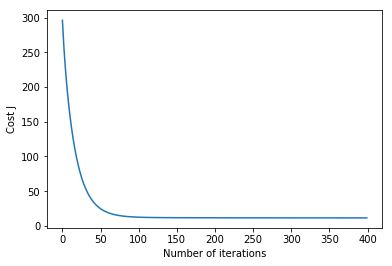

In [21]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400
lamda = 10
# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
#cost_function_regularization(X, y, theta)
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

Running gradient descent ...
Theta computed from gradient descent : 
[ 1.18960502e+01  1.95992261e+00 -3.94638673e+00 -5.70742007e-05
  4.04484394e+00 -1.00720015e-04]

 y=f(x)= 11.896050172675505 + 1.9599226089550545 x1+ -3.9463867303593743 x2+ -5.707420073726257e-05 x3+ 4.044843944555185 x4+ -0.00010072001505004308 x5


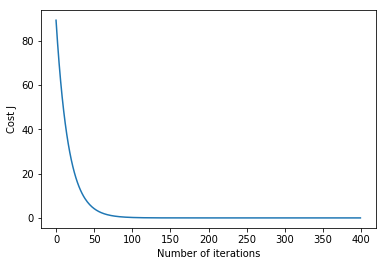

In [22]:
# for part 1 ,it is given that the polynomial is of degree 1, which means that 
# y=f(x)= w0+w1X1+w2X2+w3X3+w4X4+w5X5
#used the same logic that was done for linear regression using gradient descent
#
## Code for function 1

filename = 'data1.csv'
raw_data = open(filename, 'rt')
data = np.loadtxt(raw_data, delimiter=",")
X = data[:,:-1]
y = data[:,-1]

def feature_normalization_1(X):
  
    n = X.shape[1]
    
    mean = np.mean(X, axis=0)
    mu = np.subtract(X,mean)
    SD= np.std(X, axis=0)
    sigma = X/SD
    X_norm=(mu/SD)
  
    return X_norm

def cost_function1(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    #theta[0]=theta[0]-alpha(h0-y)**2*x[0]
    m = y.size
    cost = 0
    #print(X)
    #print(theta.T)
    #print(y)
    h0=np.dot(X,theta.T)
    t = ((h0-y)**2)/(2*m)
    for i in range(0, len(t)):
        cost= cost+ t[i]
    return cost

def gradient_descent1(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(0, num_iters):
        J_history[i] = cost_function1(X, y, theta)
        h0=np.dot(theta,X.T)
        t=(y-h0)
        temp =np.dot(t,X)
        theta +=  learning_rate*temp/m
        
    return theta ,J_history

m = y.size
X = feature_normalization_1(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

print('Running gradient descent ...')

alpha = 0.03
num_iters = 400
# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent1(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
#theta= round(theta,2)
print('Theta computed from gradient descent : \n{}'.format(theta))
print("\n y=f(x)=",theta[0],"+",theta[1],"x1+",theta[2],"x2+",theta[3],"x3+",theta[4],"x4+",theta[5],"x5")
#print("cost",J_history[num_iters-1])


### Methodology and answer for function 2

Running gradient descent ...
(1000, 1024)
Theta computed from gradient descent : 
[ 3.95676711e+01 -8.53489031e-02 -4.33490619e-03 ...  5.09851790e-03
  1.57041105e-02 -6.43051501e-04]

y=f(x)= 39.56767109999965 + -0.08534890306755857 X5+ -0.004334906193936638 X5^2 0.11367360804006878 X5^3 0.4263030594157852 X4 -1.2003045012229117 X4.X5 -0.22140533078691302 X4.X5^2 -0.05565924260830713 X4.X5^3 -4.603150095589918 X4^2.X5 -0.06081431364830759 X4^2.X5^2 -0.1771019174040702 X4^2.X5^3 +.........+ -0.01503761254990753 X1^3.X2^3.X3^3.X4^2.X5^3+ 0.004890105911754104 X1^3.X2^3.X3^3.X4^3+ 0.005098517898626243 X1^3.X2^3.X3^3.X4^3.X5+ 0.015704110483173467 X1^3.X2^3.X3^3.X4^3.X5^2+ -0.0006430515014360686 X1^3.X2^3.X3^3.X4^3.X5^3


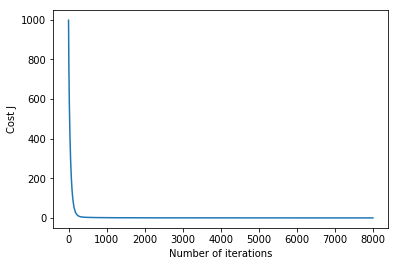

In [23]:
# for part 1 ,it is given that the polynomial is of degree 3, which means that 
# y=f(x)= w0+w1X5+w2X5^2+w3X5^3+w4X4.X5+w5X4.X5^2+w6X4.X5^3+w7X4^2.X5........+w1019.X1^3.X2^3.X3^3.X4^2.X5^3
#+w1021X1^3.X2^3.X3^3.X4^3.X5 +w1022.X1^3.X2^3.X3^3.X4^3.X5^2+w1023.X1^3.X2^3.X3^3.X4^3.X5^3
#so we have to generate 1024 W.
#First generated 1024 X,s by making X a matrix of size 1000*1024. then used gradient descent and found out all the different w

## Code for function 2

def feature_normalization_2(X):
  
    n = X.shape[1]
    
    mean = np.mean(X, axis=0)
    mu = np.subtract(X,mean)
    SD= np.std(X, axis=0)
    sigma = X/SD
    X_norm=(mu/SD)
  
    return X_norm

def cost_function2(X, y, theta):
    m = y.size
    cost = 0
    h0=np.dot(X,theta.T)
    t = ((h0-y)**2)/(2*m)
    for i in range(0, len(t)):
        cost= cost+ t[i]
    return cost

def gradient_descent2(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(0, num_iters):
        J_history[i] = cost_function2(X, y, theta)
        h0=np.dot(theta,X.T)
        t=(y-h0)
        temp =np.dot(t,X)
        theta +=  learning_rate*temp/m
        
    return theta ,J_history


#this is to conveert x in to a 1000*1023 matrix 
print('Running gradient descent ...')   
filename = 'data2.csv'
raw_data = open(filename, 'rt')
data = np.loadtxt(raw_data, delimiter = ",")
X = data[:,:-1]
y = data[:,-1]
m = y.size
X_new = np.zeros(X.shape[0])
a = np.zeros(X.shape[0])
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            for l in range(0,4):
                for q in range(0,4):
                    a = (X[:,4]**(q))*(X[:,3]**(l))*(X[:,2]**(k))*(X[:,1]**(j))*(X[:,0]**(i))
                    X_new = np.vstack((X_new,a))
                        
X_new= X_new.T
X_new = X_new[:,2:]   
#print(X_new.shape)
#X= X_new
X = feature_normalization_2(X_new)
X = np.c_[np.ones(m), X]  # Add a column of ones to X
print(X.shape)
#have given num_ierations as 8000 so as to minizie the cost to 0.083
alpha = 0.01
num_iters = 8000
# Initialize theta and execute gradient descent
# each w can have power of every X from 0-4, there are 5X's and hence they can be 4*4*4*4*4 possible values
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent2(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

y1 = np.dot(X,theta.T)
# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))
#print("cost",J_history[num_iters-1])
print("\ny=f(x)=",theta[0],"+",theta[1],"X5+",theta[2],"X5^2",theta[3],"X5^3",theta[4],"X4",theta[5],"X4.X5",theta[6],"X4.X5^2",theta[7],"X4.X5^3",theta[8],"X4^2.X5",theta[9],"X4^2.X5^2",theta[10],"X4^2.X5^3 +.........+",theta[1019],"X1^3.X2^3.X3^3.X4^2.X5^3+",theta[1020],"X1^3.X2^3.X3^3.X4^3+",theta[1021],"X1^3.X2^3.X3^3.X4^3.X5+",theta[1022],"X1^3.X2^3.X3^3.X4^3.X5^2+",theta[1023],"X1^3.X2^3.X3^3.X4^3.X5^3")
